In [22]:
#Importing needed modules .
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers , models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
#Reading csv file and getting 10 sample of that randomly .
path = "D:\\datasets\\college_reviews\\collegereview2022.csv"
file = pd.read_csv(path,index_col=0)
df = file.copy()
df.sample(10)

,Name,college,review,rating
8490,Advait Gangawanwale,Datta Meghe College of Engineering Airoli,Damn negative- to be precise\nThey will give y...,2.5
272,Karan gandha,VIT Bhopal University,"Basically, there are 5 categories of fees in V...",8.5
9306,Sachin Verma,Indian Institute of Information Technology - [...,My college follows IIIT Hyderabad in terms of ...,8.5
6947,Annangi Tanmay,VIT University - [VIT- AP],The college curriculum is set in a way that al...,8.5
4231,Muskan vishwakarma,GLA University,From the end of the 4th-semester students are ...,10.0
549,Jay Belkhode,Smt Radhikatai Pandav College of Engineering -...,Weekly seminars are organized in the college h...,7.0
6206,Rakshit singh,Sharda University - [SU],Only two events held till now - culture fest w...,7.5
4689,Vikku Ro hit,RVS College of Engineering and Technology - [R...,Best college is situated nearby my home and al...,8.0
6562,Samkit,SRM Institute of Science and Technology - [SRM...,We have pretty good famous alumni seniors are ...,7.7
4490,Sura pravinya,NRI Institute of Technology - [NRIIT],Placements and job oppurtunities are very impo...,10.0


In [24]:
#Droping duplicated samples and null values .
df = df.drop_duplicates().dropna()
#Getting information from data frame .
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9629 entries, 0 to 9696
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     9629 non-null   object 
 1   college  9629 non-null   object 
 2   review   9629 non-null   object 
 3   rating   9629 non-null   float64
dtypes: float64(1), object(3)
memory usage: 376.1+ KB


In [25]:
#Seperating labels .
label = df.rating

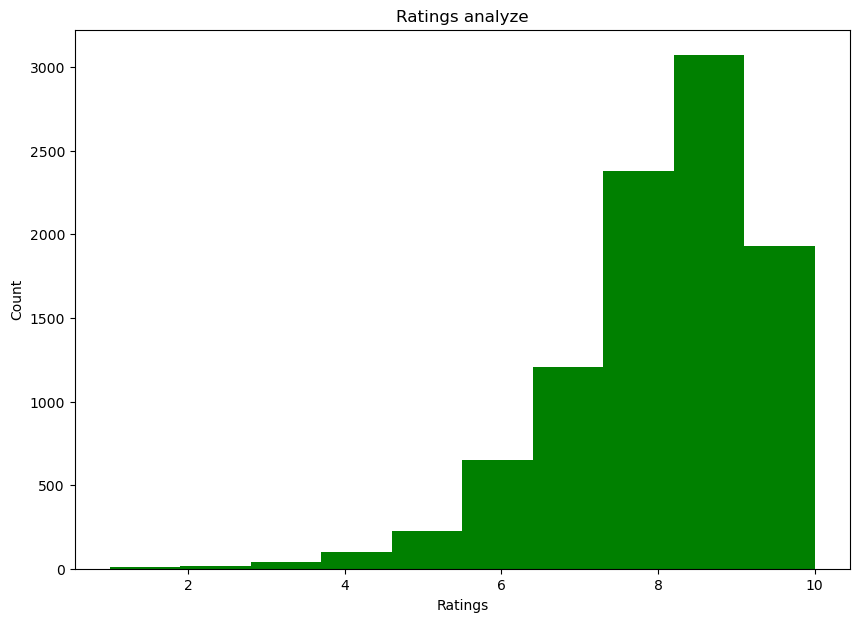

In [26]:
#Plotting a histogram of labels . 
plt.figure(figsize=(10,7))
plt.hist(label,color='green')
plt.title('Ratings analyze')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [27]:
#Creating a function to remove stop words from each text .
def Filter(text)->str:
    '''function docstring'''
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    result = [word for word in text.lower().split() if word not in stopwords]
    return ' '.join(result)

In [28]:
#Seperating features .
features = [Filter(text) for text in df.review]

In [29]:
#Tokenizing reviews and creating a matrix from them .
tokenizer = Tokenizer(oov_token='<00U00>')
tokenizer.fit_on_texts(features)
sequnces = tokenizer.texts_to_sequences(features)
matrix = pad_sequences(sequnces,padding='post',truncating='post',maxlen=30)

In [30]:
#Seperating features and labels to train and valid .
train_x , valid_x , train_y , valid_y = train_test_split(matrix,label,test_size=0.2,random_state=42)

In [31]:
print(f'There are {len(train_x)} texts for train and {len(valid_x)} texts for valid')

There are 7703 texts for train and 1926 texts for valid


In [32]:
#Defining a model by a function .
def Create_model()->None :
    '''function docstring'''
    model = models.Sequential([layers.Embedding(len(tokenizer.word_index)+1,1,input_length=30),
                               layers.Flatten(),
                               layers.Dense(3,activation='relu'),
                              layers.Dense(1)])
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [33]:
#datas train .
history = Create_model().fit(train_x,train_y,epochs = 20 , validation_data = (valid_x,valid_y))

Epoch 1/20
241/241 [==============================] - 2s 3ms/step - loss: 62.4571 - mae: 7.7920 - val_loss: 56.9862 - val_mae: 7.4348
Epoch 2/20
241/241 [==============================] - 1s 2ms/step - loss: 43.9049 - mae: 6.4623 - val_loss: 27.9660 - val_mae: 5.1195
Epoch 3/20
241/241 [==============================] - 1s 3ms/step - loss: 12.0932 - mae: 3.0273 - val_loss: 2.8436 - val_mae: 1.3404
Epoch 4/20
241/241 [==============================] - 1s 2ms/step - loss: 2.5444 - mae: 1.2499 - val_loss: 2.4600 - val_mae: 1.2267
Epoch 5/20
241/241 [==============================] - 1s 2ms/step - loss: 2.2674 - mae: 1.1715 - val_loss: 2.2752 - val_mae: 1.1778
Epoch 6/20
241/241 [==============================] - 1s 2ms/step - loss: 2.0803 - mae: 1.1154 - val_loss: 2.1419 - val_mae: 1.1314
Epoch 7/20
241/241 [==============================] - 1s 2ms/step - loss: 1.9410 - mae: 1.0711 - val_loss: 2.0633 - val_mae: 1.1178
Epoch 8/20
241/241 [==============================] - 0s 2ms/step - los

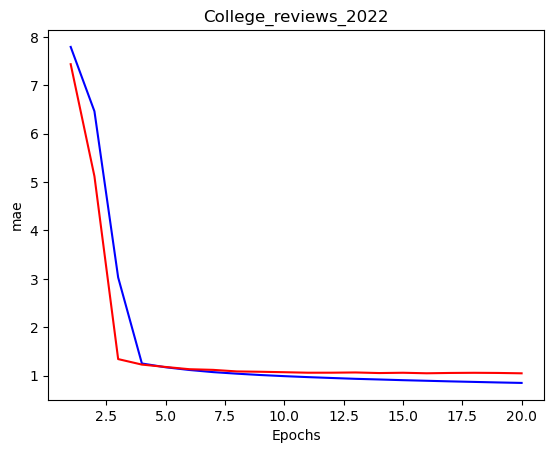

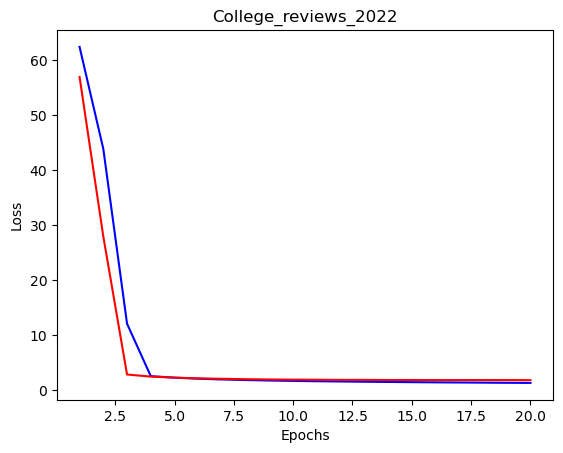

In [34]:
#Visualize models performance
epoch = range(1,21)
results = history.history
plt.plot(epoch,results['mae'],'blue')
plt.plot(epoch,results['val_mae'],'red')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.title('College_reviews_2022')
plt.show()
plt.plot(epoch,results['loss'],'blue')
plt.plot(epoch,results['val_loss'],'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('College_reviews_2022')
plt.show()